In [2]:
dataset <- read.csv('data.txt')
dataset

symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,?,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,⋯,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
Xtemp <- dataset[22]
m <- as.matrix(Xtemp)

for(x in 1:205){
  if(m[x]=="?"){
    m[x]<- 0
  }
}
dataset$horsepower <- m

In [4]:
Ytemp <- dataset[26]
m <- as.matrix(Ytemp)
for(x in 1:205){
  if(m[x]=="?"){
    m[x]<- 0
  }
}
dataset$price <- m

In [5]:
dataset$price <- as.numeric(dataset$price)
dataset$horsepower <- as.numeric(dataset$horsepower)

In [7]:
regressor <- lm(formula = dataset$horsepower ~ dataset$price)
summary(regressor)


Call:
lm(formula = dataset$horsepower ~ dataset$price)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.567 -14.681  -4.735   9.484 230.004 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.800e+01  3.910e+00   14.83   <2e-16 ***
dataset$price 3.494e-03  2.563e-04   13.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.58 on 203 degrees of freedom
Multiple R-squared:  0.4779,	Adjusted R-squared:  0.4753 
F-statistic: 185.8 on 1 and 203 DF,  p-value: < 2.2e-16


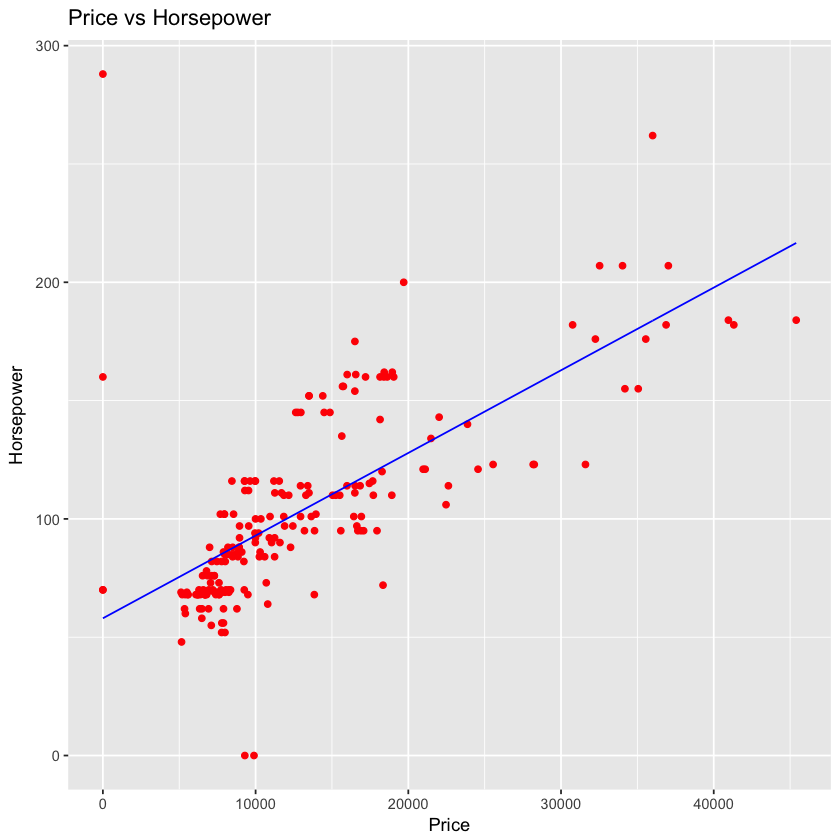

In [8]:
library(ggplot2)

ggplot() +
  geom_point(aes(x=dataset$price, y=dataset$horsepower), color='red') +
  geom_line(aes(x=dataset$price, y=predict(regressor)), color='blue') +
  ggtitle('Price vs Horsepower') +
  xlab('Price') +
  ylab('Horsepower')